In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [18]:
deadlift = pd.read_csv('./deadlift_coords.csv')

In [19]:
# Angle calculation function
def calculateAngle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Middle point
    c = np.array(c)  # End point

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(
        a[1] - b[1], a[0] - b[0]
    )
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

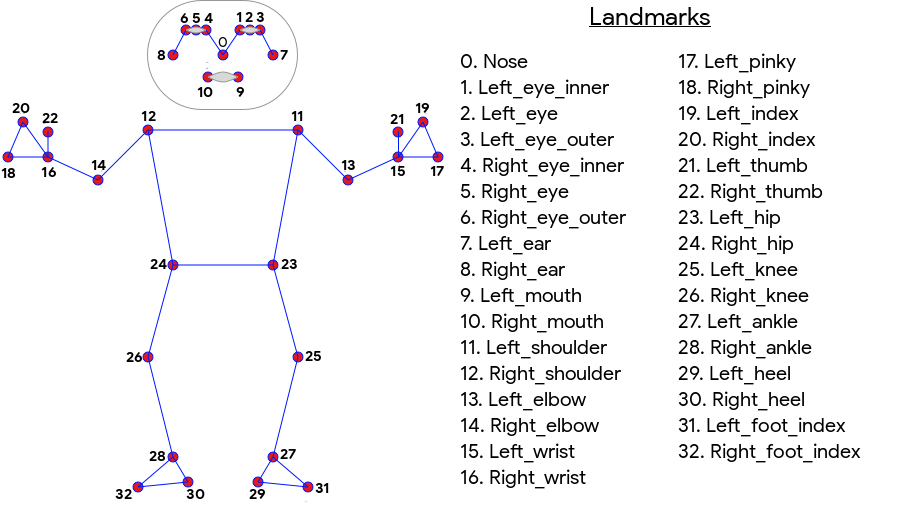

In [20]:
# Nose: x1, y1
# Left shoulder: x12, y12, Left elbow: x14, y14, Left wrist: x16, y16, Left ankle: x28, y28, Left heel: x30, y30
# Right shoulder: x13, y13, Right elbow: x15, y15, Right wrist: x17, y17, Right ankle: x29, y29, Right heel: x31, y31

In [21]:
def extract_joint_coordinates(df):
    nose = []
    left_shoulder = []
    left_elbow = []
    left_wrist = []
    left_hip = []
    left_knee = []
    left_ankle = []
    left_heel = []
    right_shoulder = []
    right_elbow = []
    right_wrist = []
    right_hip = []
    right_knee = []
    right_ankle = []
    right_heel = []

    for i in range(len(df)):
        nose.append([df['x1'].values[i], df['y1'].values[i]])
        left_shoulder.append([df['x12'].values[i], df['y12'].values[i]])
        left_elbow.append([df['x14'].values[i], df['y14'].values[i]])
        left_wrist.append([df['x16'].values[i], df['y16'].values[i]])
        left_hip.append([df['x26'].values[i], df['y26'].values[i]])
        left_knee.append([df['x28'].values[i], df['y28'].values[i]])
        left_ankle.append([df['x30'].values[i], df['y30'].values[i]])
        left_heel.append([df['x32'].values[i], df['y32'].values[i]])
        right_shoulder.append([df['x13'].values[i], df['y13'].values[i]])
        right_elbow.append([df['x15'].values[i], df['y15'].values[i]])
        right_wrist.append([df['x17'].values[i], df['y17'].values[i]])
        right_hip.append([df['x27'].values[i], df['y27'].values[i]])
        right_knee.append([df['x29'].values[i], df['y29'].values[i]])
        right_ankle.append([df['x31'].values[i], df['y31'].values[i]])
        right_heel.append([df['x33'].values[i], df['y33'].values[i]])

    return nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel

In [22]:
# Extract joint coordinates from the dataframe
nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel = extract_joint_coordinates(deadlift)

In [23]:
neck_angle = [(calculateAngle(left_shoulder[i], nose[i], left_hip[i]) + calculateAngle(right_shoulder[i], nose[i], right_hip[i])) / 2 for i in range(len(nose))]
left_elbow_angle = [calculateAngle(left_shoulder[i], left_elbow[i], left_wrist[i]) for i in range(len(left_shoulder))]
right_elbow_angle = [calculateAngle(right_shoulder[i], right_elbow[i], right_wrist[i]) for i in range(len(right_shoulder))]
left_shoulder_angle = [calculateAngle(left_elbow[i], left_shoulder[i], left_hip[i]) for i in range(len(left_elbow))]
right_shoulder_angle = [calculateAngle(right_elbow[i], right_shoulder[i], right_hip[i]) for i in range(len(right_elbow))]
left_hip_angle = [calculateAngle(left_shoulder[i], left_hip[i], left_knee[i]) for i in range(len(left_shoulder))]
right_hip_angle = [calculateAngle(right_shoulder[i], right_hip[i], right_knee[i]) for i in range(len(right_shoulder))]
left_knee_angle = [calculateAngle(left_hip[i], left_knee[i], left_ankle[i]) for i in range(len(left_hip))]
right_knee_angle = [calculateAngle(right_hip[i], right_knee[i], right_ankle[i]) for i in range(len(right_hip))]
left_ankle_angle = [calculateAngle(left_knee[i], left_ankle[i], left_heel[i]) for i in range(len(left_knee))]
right_ankle_angle = [calculateAngle(right_knee[i], right_ankle[i], right_heel[i]) for i in range(len(right_knee))]

print("Neck angle:", neck_angle)
print("Left elbow angle:", left_elbow_angle)
print("Right elbow angle:", right_elbow_angle)
print("Left shoulder angle:", left_shoulder_angle)
print("Right shoulder angle:", right_shoulder_angle)
print("Left hip angle:", left_hip_angle)
print("Right hip angle:", right_hip_angle)
print("Left knee angle:", left_knee_angle)
print("Right knee angle:", right_knee_angle)
print("Left ankle angle:", left_ankle_angle)
print("Right ankle angle:", right_ankle_angle)

Neck angle: [np.float64(24.56660977133521), np.float64(22.147488017402022), np.float64(41.18279672217919), np.float64(48.49271608616383), np.float64(46.74811494669744), np.float64(43.129971751274184), np.float64(32.74384233287768), np.float64(34.450096142432756), np.float64(29.314992186910096), np.float64(37.16456508377725), np.float64(49.482756330404186), np.float64(48.06598002090344), np.float64(46.652857015126045), np.float64(37.85752725702774), np.float64(34.30312445846894), np.float64(30.92574972789789), np.float64(44.84859513251091), np.float64(47.02138107444827), np.float64(45.36913351007017), np.float64(38.50674690712554), np.float64(38.10075509480947), np.float64(29.362123271053548), np.float64(23.148106423981993), np.float64(44.188645730301914), np.float64(44.996163673714335), np.float64(45.53713741626082), np.float64(42.22481286861109), np.float64(36.98770264750306), np.float64(25.357060993269393), np.float64(47.07276428547149), np.float64(46.876307285322966), np.float64(44.

In [24]:
def calculate_joint_angles(row):
    nose = [row['x1'], row['y1']]
    left_shoulder = [row['x12'], row['y12']]
    left_elbow = [row['x14'], row['y14']]
    left_wrist = [row['x16'], row['y16']]
    left_hip = [row['x26'], row['y26']]
    left_knee = [row['x28'], row['y28']]
    left_ankle = [row['x30'], row['y30']]
    left_heel = [row['x32'], row['y32']]
    right_shoulder = [row['x13'], row['y13']]
    right_elbow = [row['x15'], row['y15']]
    right_wrist = [row['x17'], row['y17']]
    right_hip = [row['x27'], row['y27']]
    right_knee = [row['x29'], row['y29']]
    right_ankle = [row['x31'], row['y31']]
    right_heel = [row['x33'], row['y33']]

    neck_angle = (calculateAngle(left_shoulder, nose, left_hip) + calculateAngle(right_shoulder, nose, right_hip)) / 2
    left_elbow_angle = calculateAngle(left_shoulder, left_elbow, left_wrist)
    right_elbow_angle = calculateAngle(right_shoulder, right_elbow, right_wrist)
    left_shoulder_angle = calculateAngle(left_elbow, left_shoulder, left_hip)
    right_shoulder_angle = calculateAngle(right_elbow, right_shoulder, right_hip)
    left_hip_angle = calculateAngle(left_shoulder, left_hip, left_knee)
    right_hip_angle = calculateAngle(right_shoulder, right_hip, right_knee)
    left_knee_angle = calculateAngle(left_hip, left_knee, left_ankle)
    right_knee_angle = calculateAngle(right_hip, right_knee, right_ankle)
    left_ankle_angle = calculateAngle(left_knee, left_ankle, left_heel)
    right_ankle_angle = calculateAngle(right_knee, right_ankle, right_heel)

    return pd.Series([neck_angle, left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle, left_ankle_angle, right_ankle_angle])

# Deadlift

In [25]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
deadlift[angle_columns] = deadlift.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(deadlift[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

deadlift = pd.concat([deadlift, scaled_angles_df], axis=1)
deadlift.to_csv("deadlift_with_scaled_angles.csv", index=False)
deadlift

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.950996,0.913755,0.330785,0.072821,0.911086,0.523603,0.723386,0.641266,0.253202,0.188200
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.958239,0.949642,0.319952,0.298021,0.974792,0.436400,0.859024,0.313937,0.382163,0.008144
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.812687,0.915737,0.437200,0.056541,0.573249,0.619935,0.644051,0.755962,0.332946,0.229628
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.950257,0.702023,0.360936,0.238497,0.805906,0.684383,0.470151,0.964177,0.173505,0.454810
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.867695,0.856630,0.376617,0.257785,0.956371,0.600696,0.615876,0.918872,0.238097,0.495850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,d_arms_narrow_down,0.423258,0.467540,-0.738914,0.999999,0.442992,0.451831,-0.747274,0.999997,0.453844,...,0.561735,0.886898,0.295301,0.367973,0.736614,0.844911,0.763663,0.682993,0.713810,0.336401
1136,d_arms_narrow_down,0.419347,0.455804,-0.551248,0.999999,0.440416,0.439564,-0.561443,0.999997,0.450906,...,0.522973,0.890998,0.302985,0.337825,0.739958,0.839972,0.661376,0.689986,0.633226,0.354367
1137,d_arms_narrow_down,0.412521,0.476321,-0.622205,0.999999,0.431973,0.462884,-0.633574,0.999997,0.442958,...,0.621398,0.884177,0.264897,0.417728,0.733090,0.755522,0.742157,0.711764,0.652813,0.365253
1138,d_arms_narrow_down,0.411704,0.494523,-0.582164,0.999999,0.431118,0.480473,-0.596455,0.999998,0.441991,...,0.686024,0.892699,0.318695,0.381109,0.624793,0.820471,0.779375,0.675796,0.720624,0.337550
